In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('sold_flats_2020-09-30.csv', parse_dates=['date_sold'], date_format='%Y-%m-%d')
le = LabelEncoder()
regressor = LinearRegression()

/tmp/ipykernel_6016/1500714275.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('sold_flats_2020-09-30.csv', parse_dates=['date_sold'], date_format='%Y-%m-%d')


In [3]:
dataset = dataset.dropna(subset=['sold_price', 'price', 'area_total'])
dataset['sold_price'].isnull().any()

False

In [4]:
# Границы для цен продаж
Q3_sold_price = dataset['sold_price'].quantile(0.75)
Q1_sold_price = dataset['sold_price'].quantile(0.25)
IQR_sold_price = Q3_sold_price - Q1_sold_price

# Границы для цен
Q3_price = dataset['price'].quantile(0.75)
Q1_price = dataset['price'].quantile(0.25)
IQR_price = Q3_price - Q1_price

# Границы для этажа
Q3_floor_num = dataset['floor_num'].quantile(0.75)
Q1_floor_num = dataset['floor_num'].quantile(0.25)
IQR_floor_num = Q3_floor_num - Q1_floor_num

# Границы для кол-ва комнат
Q3_rooms_cnt = dataset['rooms_cnt'].quantile(0.75)
Q1_rooms_cnt = dataset['rooms_cnt'].quantile(0.25)
IQR_rooms_cnt = Q3_rooms_cnt - Q1_rooms_cnt

# Границы для года постройки
Q3_building_year = dataset['building_year'].quantile(0.75)
Q1_building_year = dataset['building_year'].quantile(0.25)
IQR_building_year = Q3_building_year - Q1_building_year

# Границы для общей площади
Q3_area_total = dataset['area_total'].quantile(0.75)
Q1_area_total = dataset['area_total'].quantile(0.25)
IQR_area_total = Q3_area_total - Q1_area_total

In [5]:
# Очистка выбросов
dataset = dataset[(dataset['sold_price'] > (Q1_sold_price-1.5*IQR_sold_price)) & (dataset['sold_price'] < (Q3_sold_price+1.5*IQR_sold_price))]
dataset = dataset[(dataset['price'] > (Q1_price-1.5*IQR_price)) & (dataset['price'] < (Q3_price+1.5*IQR_price))]
dataset = dataset[(dataset['floor_num'] > (Q1_floor_num-1.5*IQR_floor_num)) & (dataset['floor_num'] < (Q3_floor_num+1.5*IQR_floor_num))]
dataset = dataset[(dataset['rooms_cnt'] > (Q1_rooms_cnt-1.5*IQR_rooms_cnt)) & (dataset['rooms_cnt'] < (Q3_rooms_cnt+1.5*IQR_rooms_cnt))]
dataset = dataset[(dataset['building_year'] > (Q1_building_year-1.5*IQR_building_year)) & (dataset['building_year'] < (Q3_building_year+1.5*IQR_building_year))]
dataset = dataset[(dataset['area_total'] > (Q1_area_total-1.5*IQR_area_total)) & (dataset['area_total'] < (Q3_area_total+1.5*IQR_area_total))]

<Axes: >

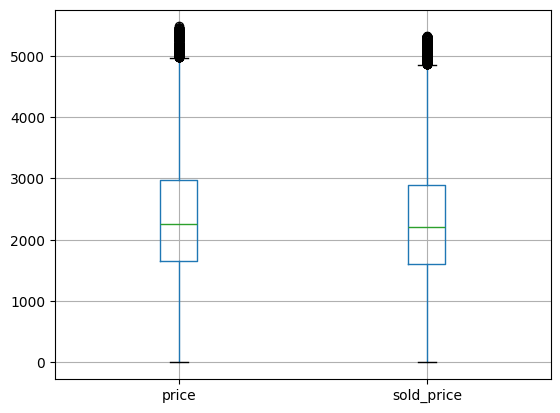

In [6]:
dataset.boxplot(column=['price', 'sold_price'])

<Axes: >

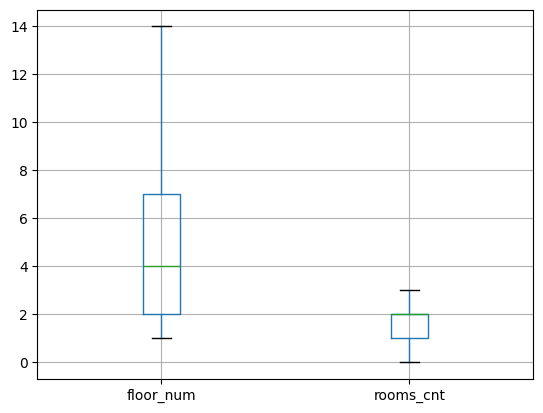

In [7]:
dataset.boxplot(column=['floor_num', 'rooms_cnt'])

<Axes: >

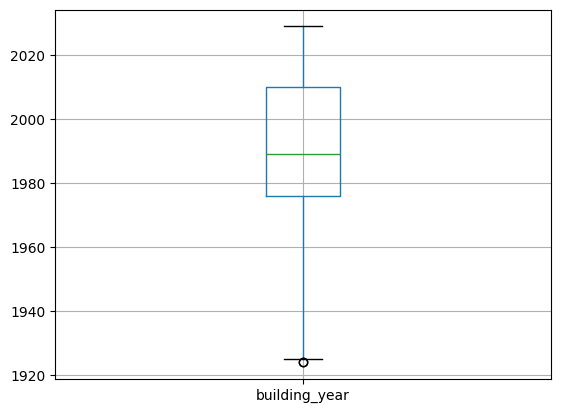

In [8]:
dataset.boxplot(column=['building_year'])

<Axes: >

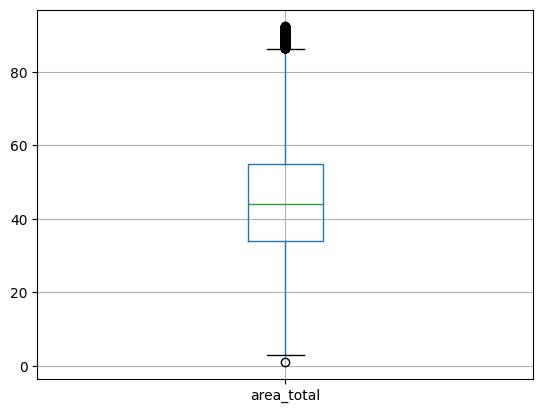

In [9]:
dataset.boxplot(column=['area_total'])

In [10]:
le.fit(dataset['floor_num'])
dataset['floor_num'] = le.transform(dataset['floor_num'])
dataset['floor_num'] = dataset['floor_num'].fillna(dataset['floor_num'].mode()[0])
dataset['floor_num'].isnull().any()

False

In [11]:
le.fit(dataset['rooms_cnt'])
dataset['rooms_cnt'] = le.transform(dataset['rooms_cnt'])
dataset['rooms_cnt'] = dataset['rooms_cnt'].fillna(dataset['rooms_cnt'].mode()[0])
dataset['rooms_cnt'].isnull().any()

False

In [12]:
dataset['building_year'] = dataset['building_year'].fillna(dataset['building_year'].mode()[0])
dataset['building_year'].isnull().any()

False

In [13]:
le.fit(dataset['wall_id'])
dataset['wall_id'] = le.transform(dataset['wall_id'])
dataset['wall_id'] = dataset['wall_id'].fillna(dataset['wall_id'].mode()[0])
dataset['wall_id'].isnull().any()

False

In [14]:
le.fit(dataset['type'])
dataset['type'] = le.transform(dataset['type'])
dataset['type'] = dataset['type'].fillna(dataset['type'].mode()[0])
dataset['type'].isnull().any()

False

In [15]:
X = dataset[
        ['city_id', 'district_id', 'street_id', 'price', 'area_total', 
         'floor_num', 'rooms_cnt', 'building_year', 'wall_id',
        'type']
    ]
Y = dataset['sold_price']

In [16]:
# plt.figure(figsize=(15,10))
# plt.tight_layout()
# sns.displot(dataset['sold_price'])

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.2, random_state=0)
regressor.fit(X_train, Y_train)

LinearRegression()

In [18]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
price,0.960884
area_total,0.768001
floor_num,0.983602
rooms_cnt,-1.698648
building_year,0.345351
wall_id,0.135257
type,-1.481383


In [19]:
Y_pred = regressor.predict(X_test)

In [20]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1 = df.head(50)
df1

,Actual,Predicted
0,2100.0,2075.429894
1,850.0,891.552406
2,3180.0,3102.803058
3,1300.0,1277.277636
4,2500.0,2548.506694
5,2300.0,2244.402173
6,1500.0,1669.040621
7,4550.0,4435.562752
8,1434.0,1431.385622
9,1600.0,1663.160902


<Axes: >

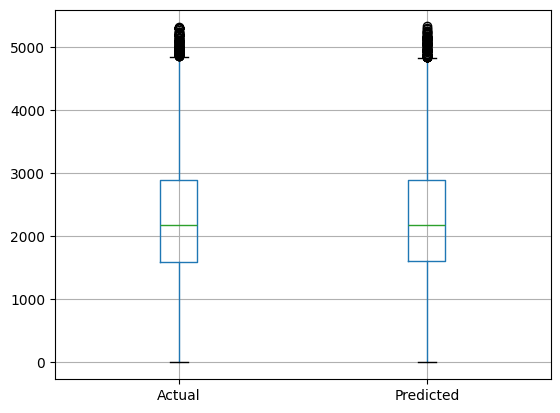

In [21]:
df.boxplot(column=['Actual', 'Predicted'])

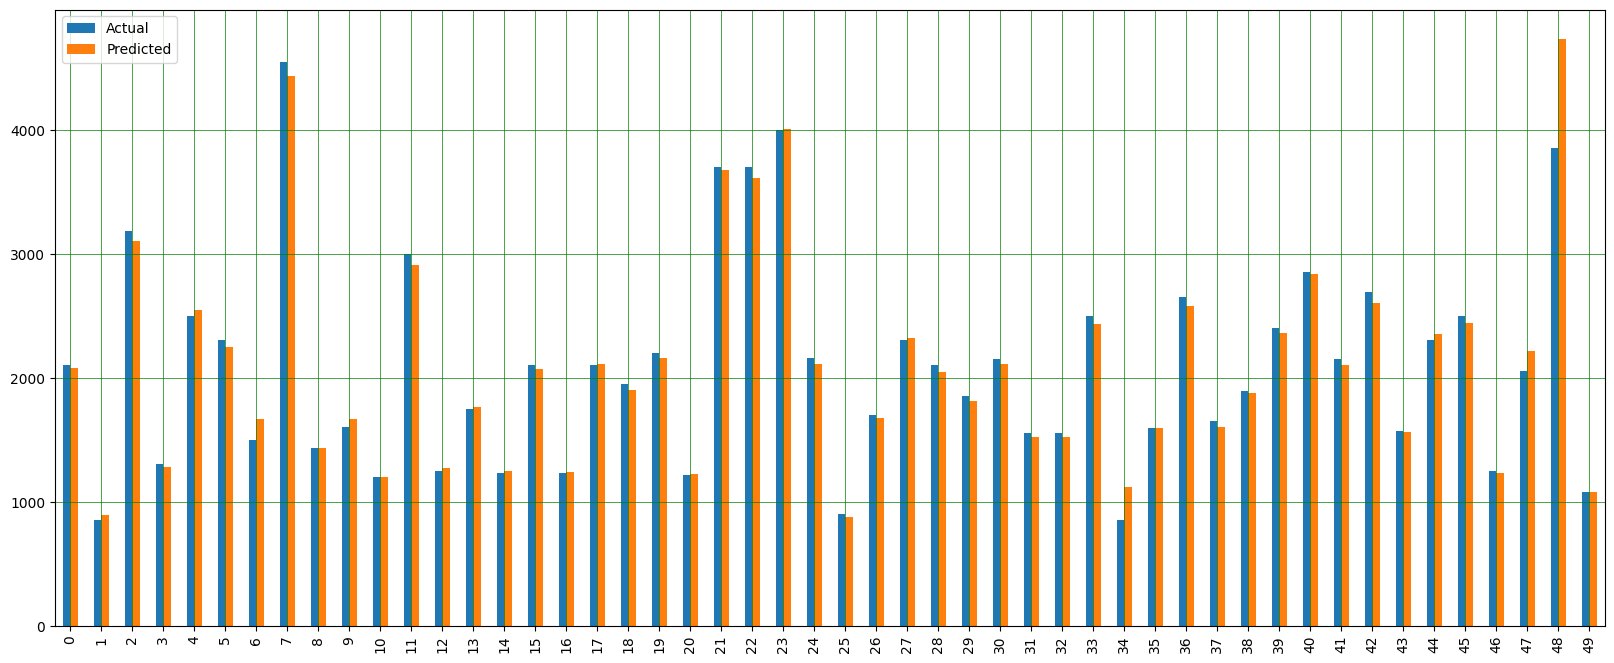

In [22]:
df1.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [23]:
print('Средняя абсолютная ошибка:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Средняя квадратическая ошибка:', metrics.mean_squared_error(Y_test, Y_pred))
print('Среднеквадратичная ошибка:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print(df['Actual'].mean())
print(df['Predicted'].mean())

Средняя абсолютная ошибка: 71.45503528041735
Средняя квадратическая ошибка: 41477.4958077603
Среднеквадратичная ошибка: 203.66024601713585
2300.5126050420167
2301.300843102802
